#### Semana 3 - Aprendizado não supervisionado

#### Algoritmo K-means

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
# Parametrizando os dados que serão agrupados
blob_centers = np.array(
    [[ 0.2,  2.3], # centro de cada grupo
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1]) # espalhamento de cada grupo (desvpad)

In [3]:
# Criando o conjunto de dados
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

In [4]:
# Funcao para plotar os clusters
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

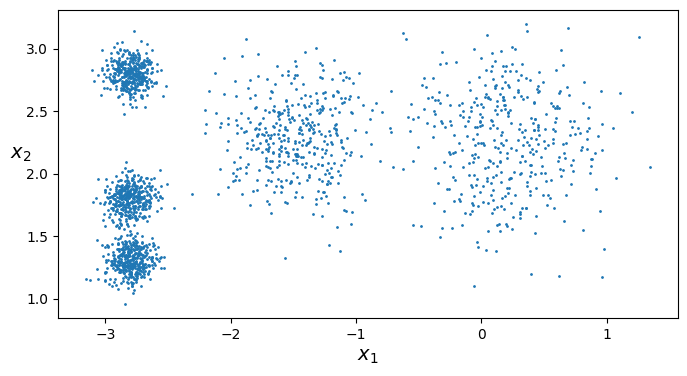

In [5]:
# Plotando os dados gerados
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

### Ajustando um modelo de agrupamento com K-means

Vamos treinar um agrupador k-means para este conjunto de dados sintético. Cada um dos conjuntos de dados deve ser atribuído a um dos grupos.

In [6]:
# Importando a biblioteca do k-means
from sklearn.cluster import KMeans

In [7]:
# Ajustando um modelo k-means para 5 grupos
kmeans_model = KMeans(n_clusters=5, random_state=0)
y_pred = kmeans_model.fit_predict(X)

Cada uma das amostras foi atribuída a um dos grupos. Os grupos são numerados de 0 a 4.

In [8]:
y_pred[:20]

array([4, 1, 2, 1, 1, 4, 1, 1, 0, 1, 1, 1, 1, 4, 1, 4, 3, 0, 3, 2],
      dtype=int32)

In [9]:
y_pred is kmeans_model.labels_

True

Os cinco centróides que definem os agrupamentos são:

In [10]:
kmeans_model.cluster_centers_

array([[-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

A denominação de pertencimento de novas amostras é feita pelo método predict.

In [11]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans_model.predict(X_new)

array([2, 2, 3, 3], dtype=int32)

### Fronteiras de decisão

Vamos plotar as fronteiras que separam os grupos, dividindo o espaço amostral em partes de domínio de cada centróide.

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)


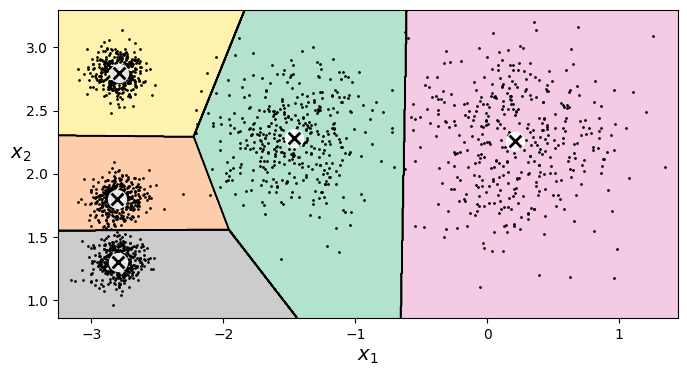

In [15]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_model, X)
plt.show()

É claro que as amostras das fronteiras podem ser classificadas de forma errada, como nas fronteiras que o grupo do meio faz. De maneira geral, ficou bem agrupado.

### Utilizando o K-means como transformador de espaço

Outra aplicação do K-means é transformar o espaço amostral. Ao invés de agrupar as amostras nos grupos definidos no treinamento, é possível fazer a medida das distâncias entre as novas amostras e os centróides ajustados.

In [16]:
# medida das distancias das novas amostras para todos os centroides ajustados
kmeans_model.transform(X_new)

array([[1.49439034, 2.81093633, 0.32995317, 2.9042344 , 2.88633901],
       [4.4759332 , 5.80730058, 2.80290755, 5.84739223, 5.84236351],
       [1.69136631, 1.21475352, 3.29399768, 0.29040966, 1.71086031],
       [1.54808703, 0.72581411, 3.21806371, 0.36159148, 1.21567622]])

Neste caso, a distância padrão é a distância euclidiana. Outras distâncias podem ser utilizadas para o ajuste do modelo, mas elas não estão implementadas na biblioteca SciKit-Learning.

### Algoritmo de treinamento

O algoritmo K-means é um dos mais simples e de convergência mais rápida.

O passo a passo para o ajuste de um modelo K-means é:

1. Inicializar um número $k$ de centróides de maneira aleatória.
2. Repita até que os centróides parem de ser alterados:
  1. Rotular todas as amostras ao centróide mais próximo.
  2. Recalcular a posição do centróide para o meio das amostras do grupo rotulado.

O sorteio dos centróides iniciais já é feito de forma otimizada (utilizando o K-means++)

In [17]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(init='random', max_iter=3, n_clusters=5, n_init=1, random_state=1)

Na Figura abaixo, podemos ver 6 momentos durantes as três iterações de treinamento do K-means. É importante destacar que o sorteio inicial dos centróides foi feito de forma aleatória.

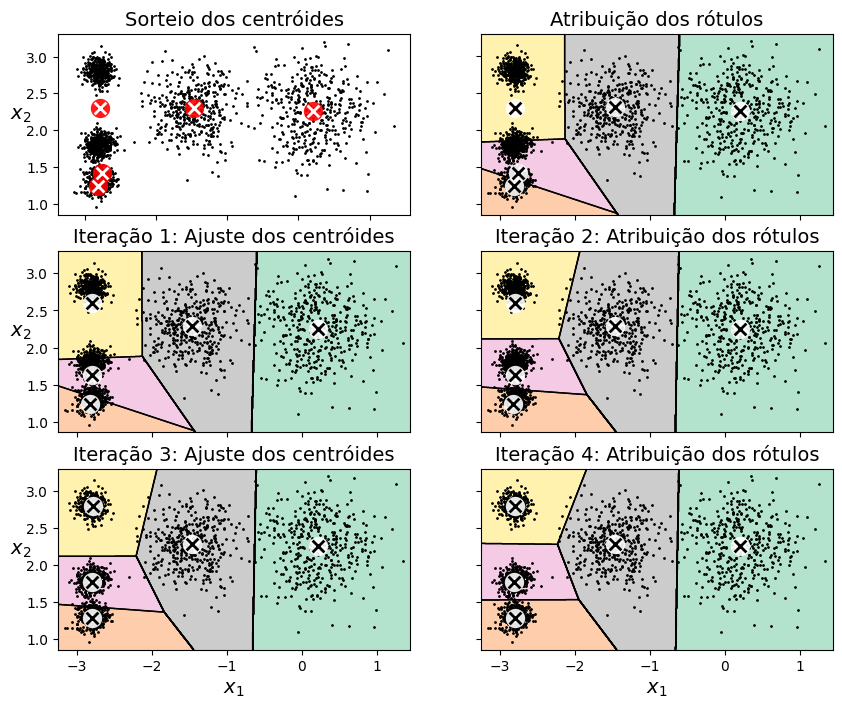

In [18]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Sorteio dos centróides", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Atribuição dos rótulos", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)
plt.title("Iteração 1: Ajuste dos centróides", fontsize=14)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)
plt.title("Iteração 2: Atribuição dos rótulos", fontsize=14)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)
plt.title("Iteração 3: Ajuste dos centróides", fontsize=14)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)
plt.title("Iteração 4: Atribuição dos rótulos", fontsize=14)

plt.show()


Aqui, o sorteio dos centróides foi feito de forma otimizada, utilizando o método do K-means++, que posiciona os centróides da maneira mais distante possível dos outros centróides. Este posicionamento é o padrão do K-means.

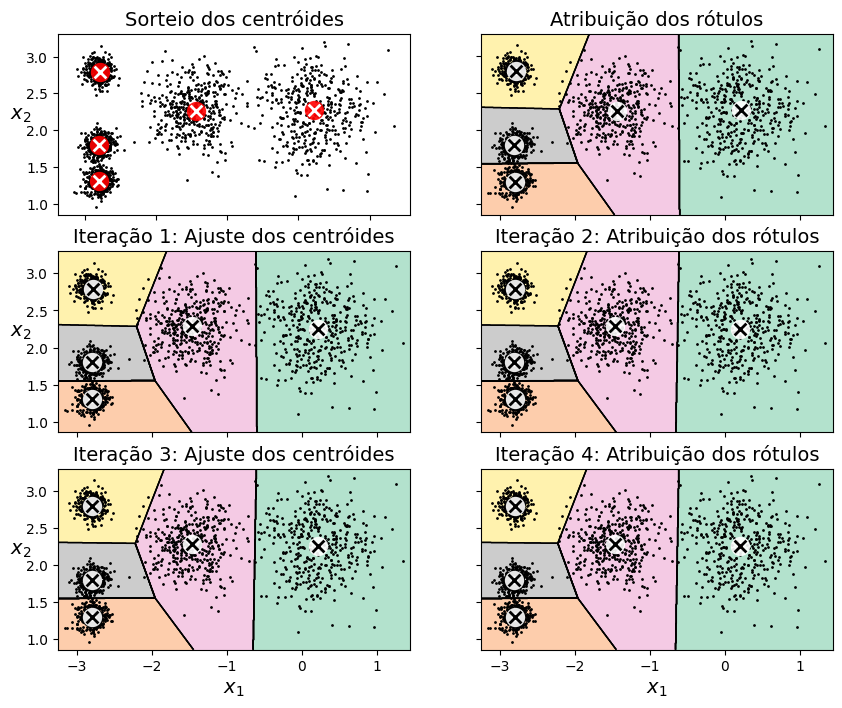

In [19]:
kmeans_iter1 = KMeans(n_clusters=5, n_init=1, max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, n_init=1, max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, n_init=1, max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Sorteio dos centróides", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Atribuição dos rótulos", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)
plt.title("Iteração 1: Ajuste dos centróides", fontsize=14)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)
plt.title("Iteração 2: Atribuição dos rótulos", fontsize=14)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)
plt.title("Iteração 3: Ajuste dos centróides", fontsize=14)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)
plt.title("Iteração 4: Atribuição dos rótulos", fontsize=14)

plt.show()


### Avaliação de um modelo K-means

Como estamos tratando de um problema de aprendizado não-supervisionado, o banco de dados não possui os valores desejados para as amostras. Então, uma forma de avaliar o desempenho destes modelos de agrupamento é medindo as distâncias das amostras até o centróide do grupo que ela pertence e somar para todas as amostras do banco de dados.

No caso do K-means, o parâmetro utilizado é a inércia (inertia), também denominada soma do erro quadrático (sum of squared error, SSE) ou soma das distâncias quadráticas intra-cluster (within-cluster sum of squares, WCSS), dado por

$$WCSS = \sum^n_{i=1}(x_i - x_{c,i})^2, $$

na qual $i$ é uma das $n$ amostras, $x_i$ são as características das amostras e $x_{c,i}$ são as características do centróide de seu respectivo grupo.

In [20]:
kmeans_model.inertia_

211.5985372581684

Quanto menor a inércia do modelo, mais próximo dos centróides estão as amostras.

A métrica `score()` também retorna o desempenho do modelo, mas com o sinal negativo.

In [21]:
kmeans_model.score(X)

-211.5985372581684

## Aula 2 - Parâmetros e ajuste do modelo

O algoritmo K-means possui apenas um parâmetro para ser ajustado, o número de agrupamentos (clusters). É a partir do número de clusters que o algoritmo começa a processar o ajuste dos agrupamentos, com o intuito de representar a divisão dos grupos com o menor distanciamento do centróide.

Vamos fazer o exemplo anterior com números diferentes de agrupamentos e medir seus parâmetros de desempenho.

In [26]:
# Funcao para comparar dois modelos K-means
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

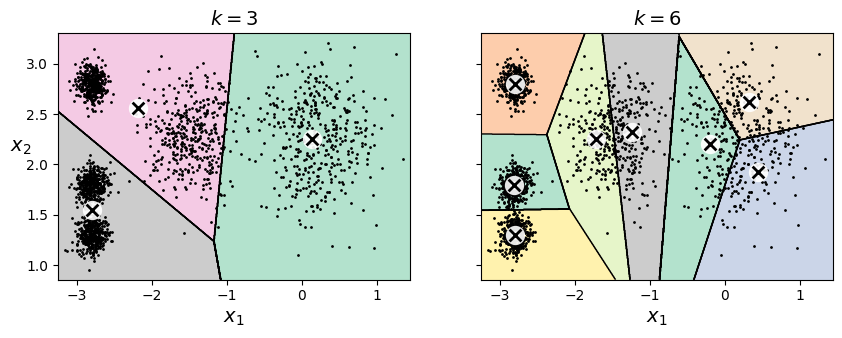

In [33]:
# Clusters K-means com 3 e 8 agrupamentos
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=6$")
plt.show()

Pela separação dos agrupamentos, é qualitativamente notável que o modelo com 8 grupos mantém as amotras em grupos mais concisos.

Podemos verificar quantitativamente qual dos dois agrupamentos obteve o melhor desempenho, verificando o indicador de inércia.

In [34]:
print(f"Inércia do modelo K-means com 3 clusters: {kmeans_k3.inertia_}")
print(f"Inércia do modelo K-means com 8 clusters: {kmeans_k8.inertia_}")

Inércia do modelo K-means com 3 clusters: 653.2167190021552
Inércia do modelo K-means com 8 clusters: 127.13141880461839


Neste caso, podemos nos certificar pelo indicador de inércia que o modelo de 8 clusters é melhor que o de 3 clusters.

É intuitivo pensar que quanto maior o número de grupos, menor será o indicador de separação. Vamos analisar a curva de inércia pela quantidade de clusters em diferentes modelos.

In [35]:
kmeans_per_k = [KMeans(n_clusters=k, max_iter=1000, n_init=100, random_state=0).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]


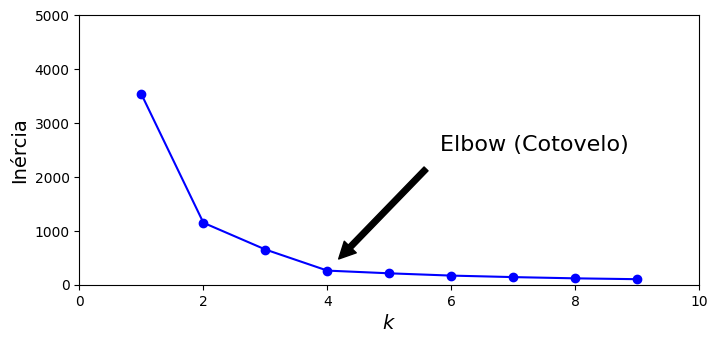

In [40]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inércia", fontsize=14)
plt.annotate(
    'Elbow (Cotovelo)',
    xy=(4, inertias[3]),
    xytext=(0.55, 0.55),
    textcoords='figure fraction',
    fontsize=16,
    arrowprops=dict(facecolor='black', shrink=0.1)
)
plt.axis([0, 10, 0, 5000])
plt.show()

Esta é a curva de cotovelo (Elbow curve), que representa a inércia pelo número de clusters $k$. É um dos modos de verificar qual o melhor número de agrupamentos que ajusta melhor o espaço amostral do problema.

O valor de inércia para 4 clusters é o mais indicado se utilizarmos esta análise. Ele é o mais indicado porque é o número de agrupamentos em que ocorre a maior queda na inércia. Entretanto, sabemos que a melhor forma de agrupar este conjunto de dados é com 5 clusters, conforme podemos ver nas fronteias do espaço amostral abaixo (com 4 grupos).

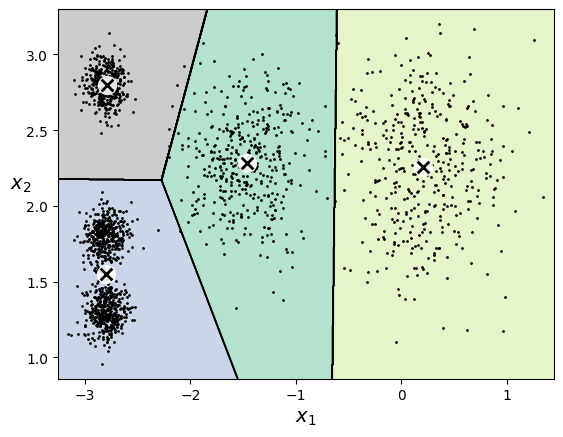

In [38]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

Então, este indicador nos fornece uma ideia dos melhores valores, mas ele não deve ser analisado sozinho. Outro indicador que podemos analisar é o valor de silhueta (silhouette score) ou o coeficiente de silhueta (silhouette coefficient).

O coefficiente de silhueta de uma amostra é dado por $$SS = \frac{(b - a)}{max(a,b)},$$ na qual $a$ é a distância média de todas as outras amostras do mesmo cluster para esta amostra (distância média intra-cluster) e $b$ é a distância média desta amostra para todas as outras amostras do cluster mais próximo (distância média para o cluster mais próximo).

O coefficiente de silhueta pode variar entre -1 e +1. Valores próximos a -1 significa que que a amostra pode estar atribuída ao cluster errado, valores próximos a 0 significa que a amostra está próxima à fronteira de clusters e valores próximos a +1, que a amostra está bem encaixada no cluster que ela está atribuída.

In [41]:
from sklearn.metrics import silhouette_score

In [42]:
silhouette_score(X, kmeans_model.labels_)

np.float64(0.655517642572828)

O valor de silhueta, ou `silhouette_score`, é a média do coeficiente de silhueta para todas as amostras do conjunto testado.

Podemos calcular o valor de silhueta para modelos com diferentes números de clusters e comparar o quão bom é o agrupamento para suas amostras.

In [43]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

In [44]:
silhouette_scores

[np.float64(0.5966442557582528),
 np.float64(0.5723900247411775),
 np.float64(0.688531617595759),
 np.float64(0.655517642572828),
 np.float64(0.60247596151111),
 np.float64(0.6070979466596362),
 np.float64(0.5614686225605264),
 np.float64(0.5670143540421614)]

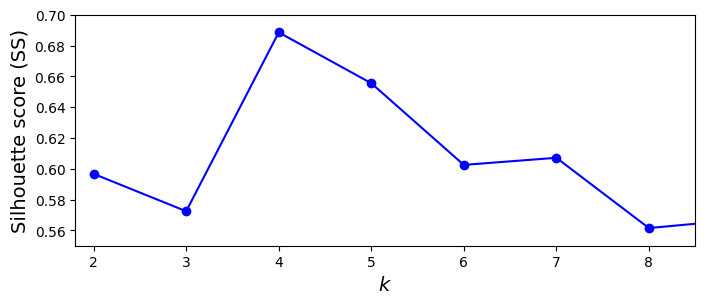

In [45]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score (SS)", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

Na figura acima, o SS para o modelo de 4 grupos ainda mostra que ele é um melhor resultado. Entretanto, é necessário lembrar que o valor de silhueta é uma média de todas as amostras.  

Quando geramos o coeficiente de silhueta para cada amostra, podemos mostrar de forma mais completa como está a divisão dos agrupamentos para cada modelo. É o que chamamos de diagrama de silhueta (silhouette diagram).

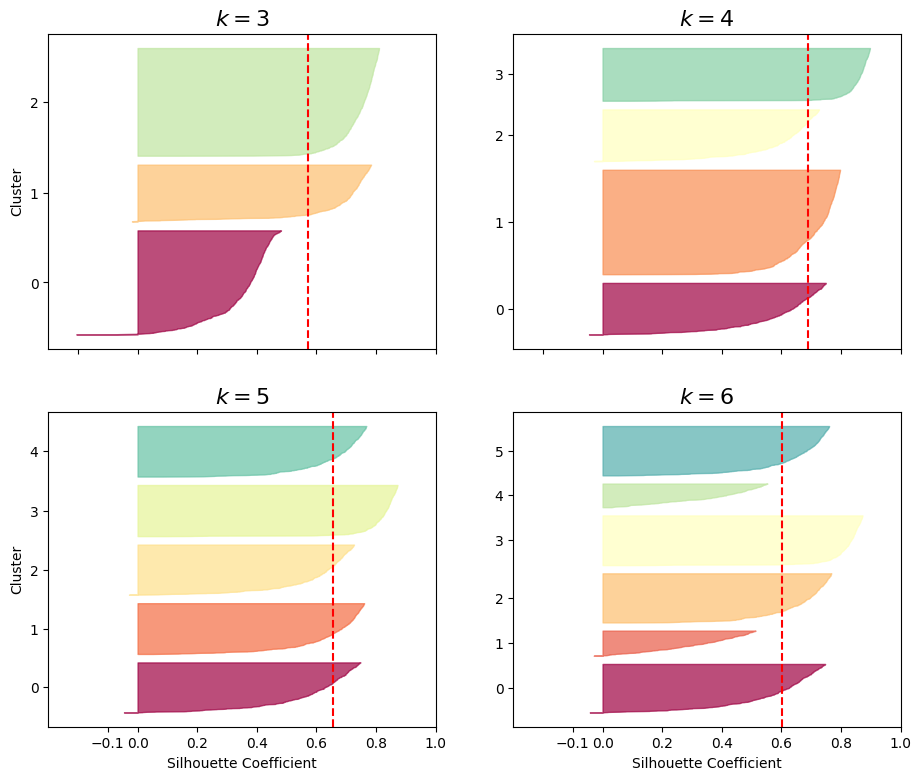

In [46]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import pylab as pl

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = pl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs, facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    plt.xlim(-0.3, 1)

    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()


Pelo diagrama de silhueta, podemos ver que:
- para $k=3$ clusters:
  - a divisão de dados fica muito desproporcional entre os grupos.
  - a forma com que o grupo 2 é representado, com a quebra na parte de baixo, também  mostra que um grupo de amostras está bem mais distante do que a outra.
- para $k=6$ clusters:
  - o comportamento das curvas do grupo 5 e do grupo 2, em forma de triângulo, mostra que muitas amostras estão distantes destes centróides.

Abaixo podemos ver na figura como está a separação do espaço amostral para os dois modelos mencionados.

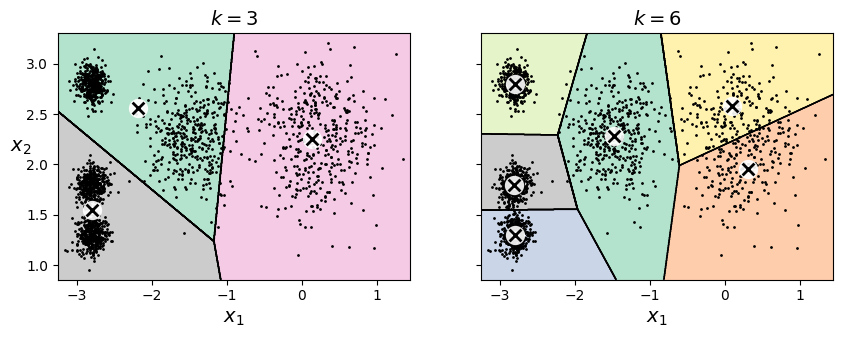

In [47]:
plot_clusterer_comparison(kmeans_per_k[3-1], kmeans_per_k[6-1], X, "$k=3$", "$k=6$")
plt.show()

Ainda, pelo diagrama de silhueta, podemos ver que para os modelos com 4 e 5 clusters, as curvas são apresentadas de forma uniforme, em formato de faca. Como podemos ver, a distribuição das amostras está mais uniforme no modelo com 5 clusters.

Abaixo podemos ver na figura como está a separação do espaço amostral para os dois modelos mencionados.

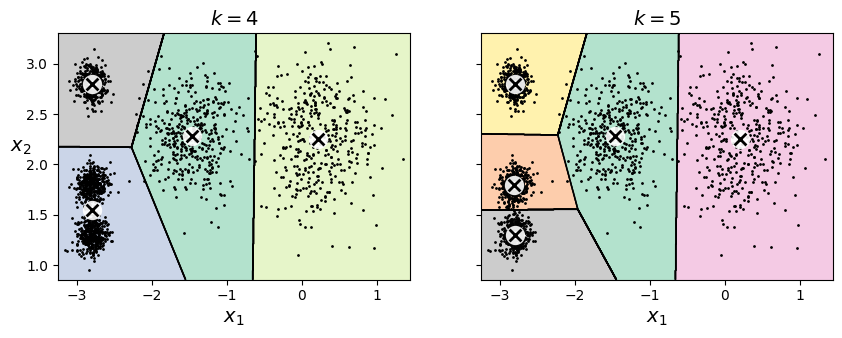

In [48]:
plot_clusterer_comparison(kmeans_per_k[4-1], kmeans_per_k[5-1], X, "$k=4$", "$k=5$")
plt.show()

Na separação do espaço amostral, os dois clusters da direita são muito espalhados. Com isso, as métricas, que relacionam as distâncias, são muito influenciadas. É possível dizer, portanto, que o modelo com 5 clusters é o mais indicado para este problema.

### Limitações do K-means

Como visto no exemplo anterior, o algoritmo K-means possui uma limitação para quando o conjunto de dados possui um espalhamento não radial. Um exemplo deste espalhamento não radial pode ser visto abaixo.

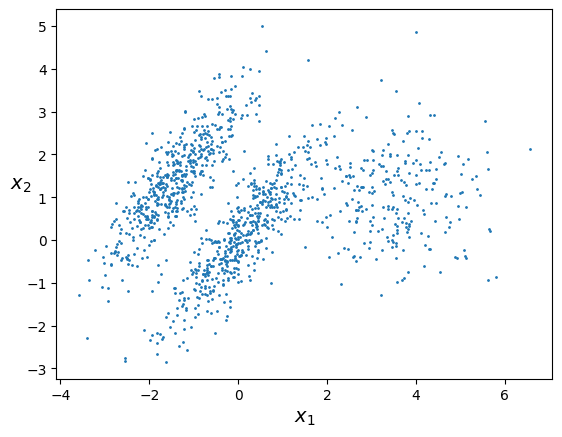

In [49]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

plot_clusters(X)

Neste caso, o grupo do meio e o grupo da esquerda se espalham na diagonal, enquanto o grupo da direita de forma radial. Se treinarmos modelos para agrupar estes dados, vamos ver que os modelos não vão conseguir bons grupos.

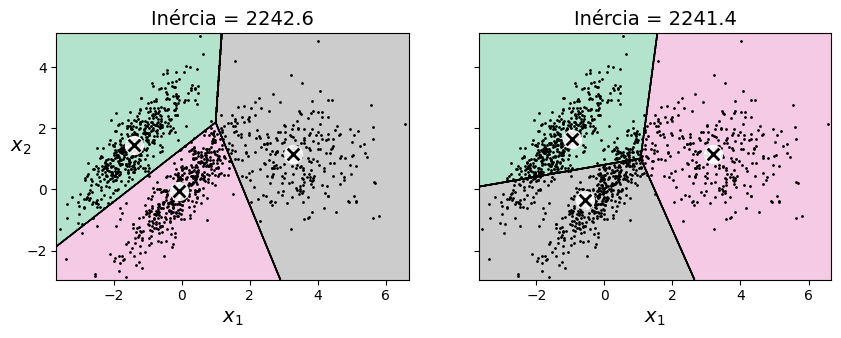

In [50]:
# Ajuste de modelos K-means
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=1)
kmeans_bad = KMeans(n_clusters=3,random_state=2)
kmeans_good.fit(X)
kmeans_bad.fit(X)

plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inércia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inércia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()

Neste exemplo podemos ver que, mesmo com valores de inércia próximos, o agrupamento dos grupos são muito diferentes. Ainda, os agrupamentos de ambos os modelos não conseguiram separar os grupos de forma correta, deixando as amostras mais distantes, as que estão espalhadas na diagonal, ser agrupada em outros grupos.